# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
!pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats
# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 618


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?" 
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []


# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = requests.get(query_url+city).json()
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = city_url['weather']

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat =  city_url['coord']['lat']
        city_lng =  city_url['coord']['lon']
        city_max_temp =  city_url['main']['temp_max']
        city_humidity =  city_url['main']['humidity']
        city_clouds =  city_url['clouds']['all']
        city_wind =  city_url['wind']['speed']
        city_country =  city_url['sys']['country']
        city_date =  city_url['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | porto velho
Processing Record 2 of Set 1 | marathon
Processing Record 3 of Set 1 | kahului
Processing Record 4 of Set 1 | tiznit
Processing Record 5 of Set 1 | cabo rojo
Processing Record 6 of Set 1 | robertsport
Processing Record 7 of Set 1 | port alfred
Processing Record 8 of Set 1 | matay
Processing Record 9 of Set 1 | montague
Processing Record 10 of Set 1 | amderma
City not found. Skipping...
Processing Record 11 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 12 of Set 1 | alindao
Processing Record 13 of Set 1 | henties bay
Processing Record 14 of Set 1 | beya
Processing Record 15 of Set 1 | bredasdorp
Processing Record 16 of Set 1 | baruun-urt
Processing Record 17 of Set 1 | lavrentiya
Processing Record 18 of Set 1 | lander
Processing Record 19 of Set 1 | saint-georges
Processing Record 20 of Set 1 | safaga
Processing Record 21 of Set 1 | wanning
Processing Record 22 of 

Processing Record 38 of Set 4 | sorland
Processing Record 39 of Set 4 | peleduy
Processing Record 40 of Set 4 | teya
Processing Record 41 of Set 4 | traverse city
Processing Record 42 of Set 4 | toliary
City not found. Skipping...
Processing Record 43 of Set 4 | umm durman
City not found. Skipping...
Processing Record 44 of Set 4 | lichuan
Processing Record 45 of Set 4 | gonen
Processing Record 46 of Set 4 | verkhnyaya toyma
Processing Record 47 of Set 4 | urucara
Processing Record 48 of Set 4 | jiangyou
Processing Record 49 of Set 4 | decatur
Processing Record 0 of Set 5 | vestmannaeyjar
Processing Record 1 of Set 5 | amurzet
Processing Record 2 of Set 5 | saleaula
City not found. Skipping...
Processing Record 3 of Set 5 | loukhi
Processing Record 4 of Set 5 | meulaboh
Processing Record 5 of Set 5 | pevek
Processing Record 6 of Set 5 | butaritari
Processing Record 7 of Set 5 | faanui
Processing Record 8 of Set 5 | tsihombe
City not found. Skipping...
Processing Record 9 of Set 5 | zih

Processing Record 26 of Set 8 | inhambane
Processing Record 27 of Set 8 | victoria
Processing Record 28 of Set 8 | malartic
Processing Record 29 of Set 8 | ribeira grande
Processing Record 30 of Set 8 | sorvag
City not found. Skipping...
Processing Record 31 of Set 8 | filadelfia
Processing Record 32 of Set 8 | bandarbeyla
Processing Record 33 of Set 8 | waipawa
Processing Record 34 of Set 8 | copperas cove
Processing Record 35 of Set 8 | saint-philippe
Processing Record 36 of Set 8 | havelock
Processing Record 37 of Set 8 | port hedland
Processing Record 38 of Set 8 | nantucket
Processing Record 39 of Set 8 | enumclaw
Processing Record 40 of Set 8 | yanam
Processing Record 41 of Set 8 | asyut
Processing Record 42 of Set 8 | coquimbo
Processing Record 43 of Set 8 | dekar
Processing Record 44 of Set 8 | williams lake
Processing Record 45 of Set 8 | salta
Processing Record 46 of Set 8 | praia da vitoria
Processing Record 47 of Set 8 | bilma
Processing Record 48 of Set 8 | amapa
Processin

Processing Record 18 of Set 12 | wana
Processing Record 19 of Set 12 | sweetwater
Processing Record 20 of Set 12 | sataua
City not found. Skipping...
Processing Record 21 of Set 12 | soyo
Processing Record 22 of Set 12 | fort nelson
Processing Record 23 of Set 12 | sanghar
Processing Record 24 of Set 12 | apac
Processing Record 25 of Set 12 | khonuu
City not found. Skipping...
Processing Record 26 of Set 12 | lasa
Processing Record 27 of Set 12 | cassilandia
Processing Record 28 of Set 12 | arys
Processing Record 29 of Set 12 | puerto escondido
Processing Record 30 of Set 12 | vuktyl
Processing Record 31 of Set 12 | kerki
City not found. Skipping...
Processing Record 32 of Set 12 | olinda
Processing Record 33 of Set 12 | sistranda
Processing Record 34 of Set 12 | norman wells
Processing Record 35 of Set 12 | rujewa
Processing Record 36 of Set 12 | kasempa
Processing Record 37 of Set 12 | ruston
Processing Record 38 of Set 12 | souris
Processing Record 39 of Set 12 | nizhniy ingash
Proc

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,porto velho,-8.7619,-63.9039,25.03,88,20,1.03,BR,1681349271
1,marathon,44.9000,-89.7668,25.58,36,0,4.63,US,1681349469
2,kahului,20.8947,-156.4700,28.01,58,40,9.26,US,1681349319
3,tiznit,29.5833,-9.5000,20.12,28,0,1.11,MA,1681349348
4,cabo rojo,18.0866,-67.1457,26.90,79,91,0.45,PR,1681349470


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,porto velho,-8.7619,-63.9039,25.03,88,20,1.03,BR,1681349271
1,marathon,44.9000,-89.7668,25.58,36,0,4.63,US,1681349469
2,kahului,20.8947,-156.4700,28.01,58,40,9.26,US,1681349319
3,tiznit,29.5833,-9.5000,20.12,28,0,1.11,MA,1681349348
4,cabo rojo,18.0866,-67.1457,26.90,79,91,0.45,PR,1681349470


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

C:\Users\JJ\AppData\Local\Temp\ipykernel_24412\2258528049.py:10: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  plt.title('City Latitude vs. Max Temperature ' + '(' + str(pd.datetime.now().date()) + ')', fontsize=15)


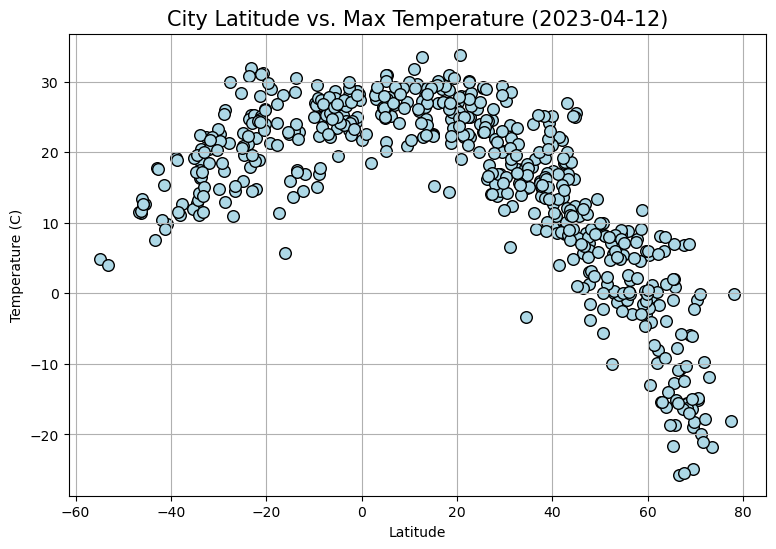

In [9]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(9,6))
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], marker='o', edgecolors='black', color='lightblue',  s=[70])


# Incorporate the other graph properties

plt.xlabel("Latitude")
plt.ylabel ("Temperature (C)")
plt.title('City Latitude vs. Max Temperature ' + '(' + str(pd.datetime.now().date()) + ')', fontsize=15)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

C:\Users\JJ\AppData\Local\Temp\ipykernel_24412\3323407442.py:8: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  plt.title("City Latitude vs. Humidity"  + '(' + str(pd.datetime.now().date()) + ')', fontsize=15)


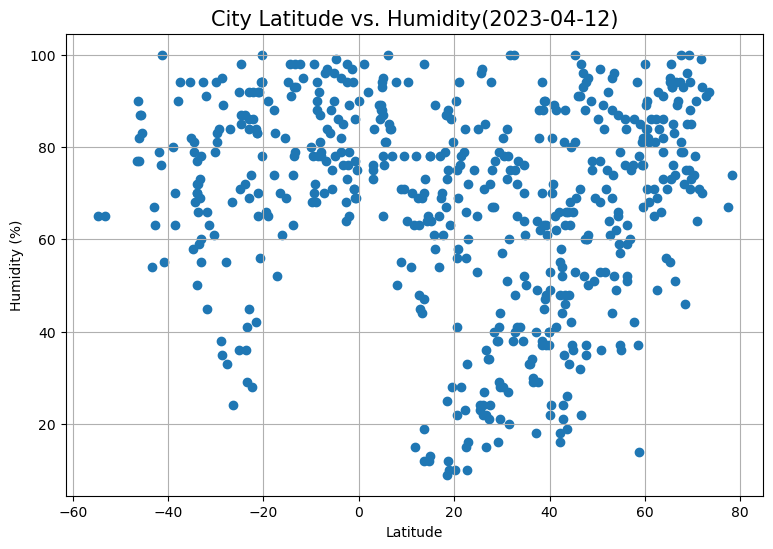

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(9,6))
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel ("Humidity (%)")
plt.title("City Latitude vs. Humidity"  + '(' + str(pd.datetime.now().date()) + ')', fontsize=15)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

C:\Users\JJ\AppData\Local\Temp\ipykernel_24412\1829465366.py:8: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  plt.title("City Latitude vs. Cloudiness" + '(' + str(pd.datetime.now().date()) + ')', fontsize=15)


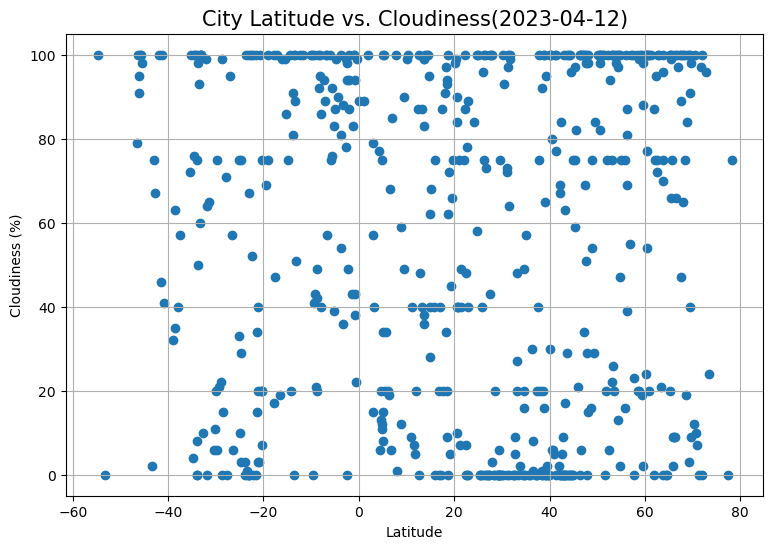

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(9,6))
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel ("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness" + '(' + str(pd.datetime.now().date()) + ')', fontsize=15)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

C:\Users\JJ\AppData\Local\Temp\ipykernel_24412\3699824232.py:8: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  plt.title("City Latitude vs. Wind Speed" + '(' + str(pd.datetime.now().date()) + ')', fontsize=15)


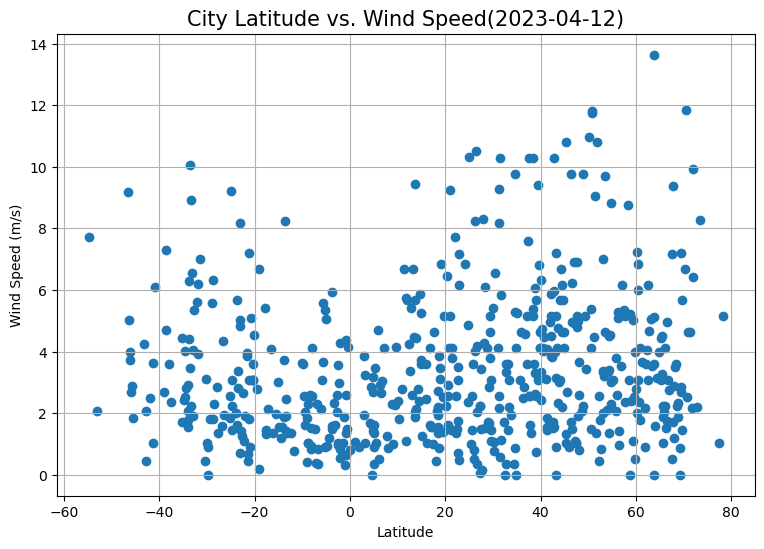

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(9,6))
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel ("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed" + '(' + str(pd.datetime.now().date()) + ')', fontsize=15)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def lregress(x_val,y_val,a,b):
    plt.figure(figsize=(9,6))
    plt.scatter(x_val,y_val)
    (slope, intercept,r,p,stderr)=linregress(x_val,y_val)
    line=x_val*slope+intercept
    plt.plot(x_val,line,"r-")
    plt.annotate(f"y = {round(slope,2)}x + {round(intercept,2)}",(a,b),color="red",size=15)
    print(f"The r-squared value is:{r**2}")

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,marathon,44.9000,-89.7668,25.58,36,0,4.63,US,1681349469
2,kahului,20.8947,-156.4700,28.01,58,40,9.26,US,1681349319
3,tiznit,29.5833,-9.5000,20.12,28,0,1.11,MA,1681349348
4,cabo rojo,18.0866,-67.1457,26.90,79,91,0.45,PR,1681349470
5,robertsport,6.7533,-11.3686,26.68,84,6,3.04,LR,1681349470


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat']<=0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,porto velho,-8.7619,-63.9039,25.03,88,20,1.03,BR,1681349271
6,port alfred,-33.5906,26.8910,18.45,59,93,3.48,ZA,1681349302
10,henties bay,-22.1160,14.2845,14.85,86,0,1.90,NaN,1681349388
12,bredasdorp,-34.5322,20.0403,12.84,79,100,2.51,ZA,1681349297
19,yulara,-25.2406,130.9889,28.37,36,75,1.83,AU,1681349414


###  Temperature vs. Latitude Linear Regression Plot

The r-squared value is:0.772673740975811


Text(0.5, 1.0, 'City Latitude vs. Temperature')

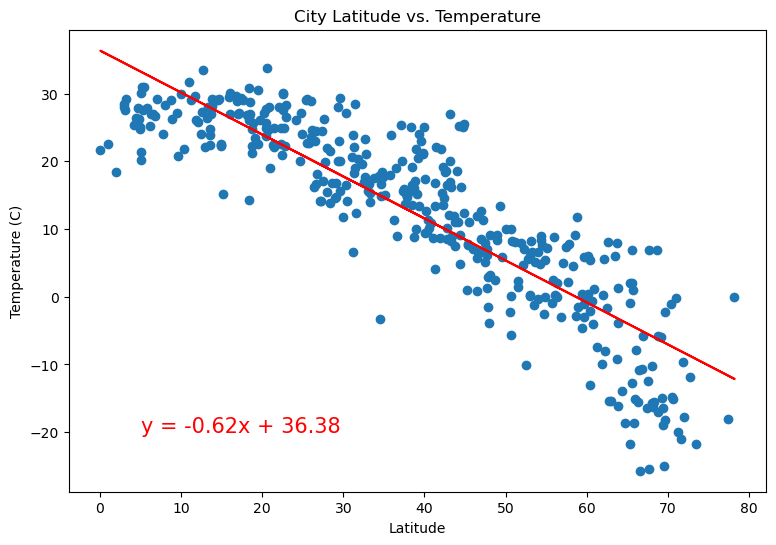

In [16]:
# Linear regression on Northern Hemisphere
x_val = northern_hemi_df['Lat']
y_val = northern_hemi_df['Max Temp']
lregress(x_val,y_val,5,-20)
plt.xlabel("Latitude")
plt.ylabel ("Temperature (C)")
plt.title("City Latitude vs. Temperature")

The r-squared value is:0.4583278527806678


Text(0.5, 1.0, 'City Latitude vs. Temperature')

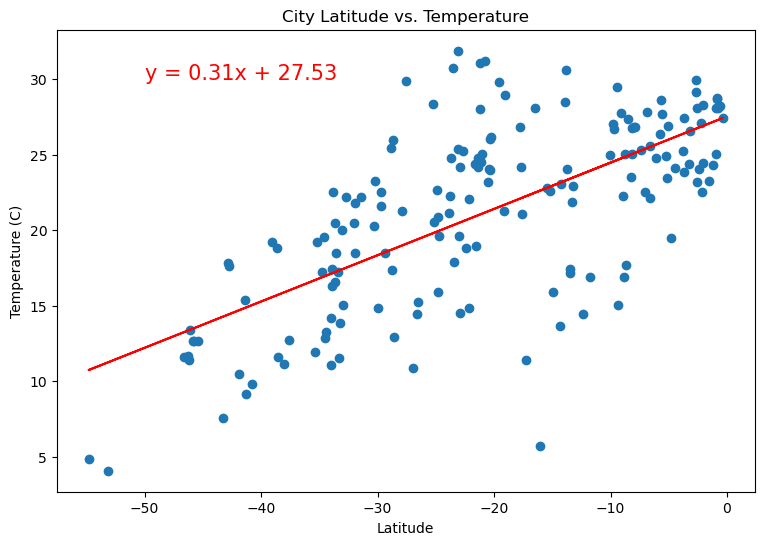

In [17]:
# Linear regression on Southern Hemisphere
x_val = southern_hemi_df['Lat']
y_val = southern_hemi_df['Max Temp']
lregress(x_val,y_val,-50,30)
plt.xlabel("Latitude")
plt.ylabel ("Temperature (C)")
plt.title("City Latitude vs. Temperature")

**Discussion about the linear relationship:**
We can see a direct correlatation of temperature and Latitude, the further we are from the ecuator the more te temperature increases, and vice-versa. As despicted by the slopes. 

### Humidity vs. Latitude Linear Regression Plot

The r-squared value is:0.03347561916298132


Text(0.5, 1.0, 'City Latitude vs. Humidity')

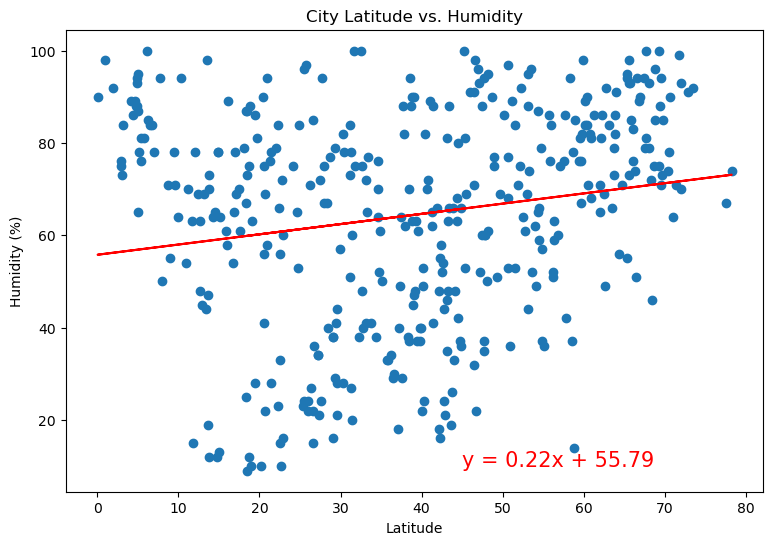

In [18]:
# Northern Hemisphere
x_val = northern_hemi_df['Lat']
y_val = northern_hemi_df['Humidity']
lregress(x_val,y_val,45,10)
plt.xlabel("Latitude")
plt.ylabel ("Humidity (%)")
plt.title("City Latitude vs. Humidity")

The r-squared value is:0.04969340254451228


Text(0.5, 1.0, 'City Latitude vs. Humidity')

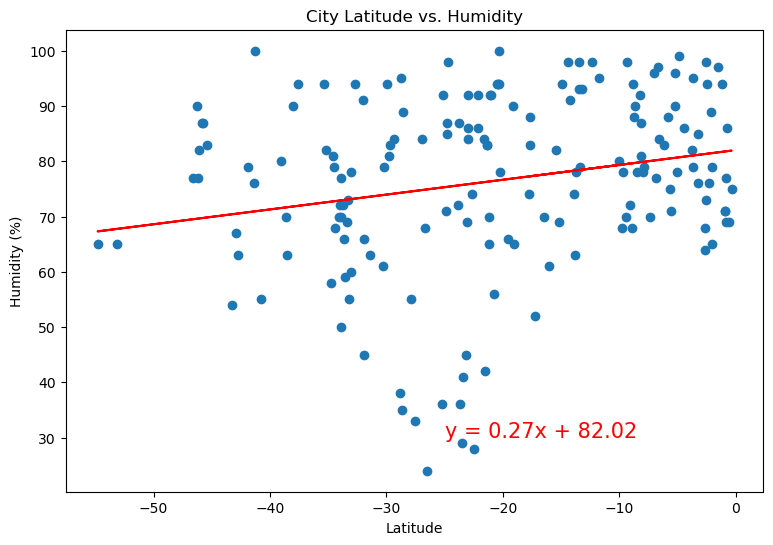

In [19]:
# Southern Hemisphere
x_val = southern_hemi_df['Lat']
y_val = southern_hemi_df['Humidity']
lregress(x_val,y_val,-25,30)
plt.xlabel("Latitude")
plt.ylabel ("Humidity (%)")
plt.title("City Latitude vs. Humidity")

**Discussion about the linear relationship:** We see low positive correlation between Humidity and Lat in the northern hemisphere and about no correlation in the southern hemisphere. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared value is:0.020485707101269564


Text(0.5, 1.0, 'City Latitude vs. Cloudiness')

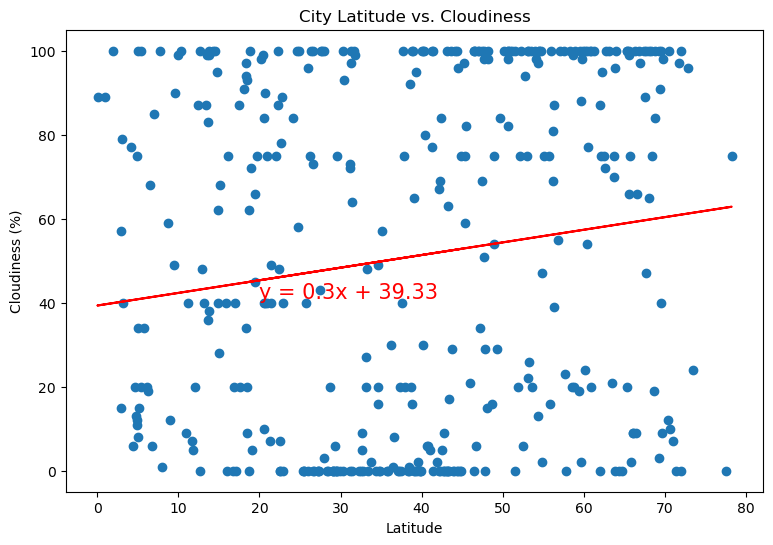

In [20]:
# Northern Hemisphere
x_val = northern_hemi_df['Lat']
y_val = northern_hemi_df['Cloudiness']
lregress(x_val,y_val,20,41)
plt.xlabel("Latitude")
plt.ylabel ("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness")

The r-squared value is:0.019482828905018068


Text(0.5, 1.0, 'City Latitude vs. Cloudiness')

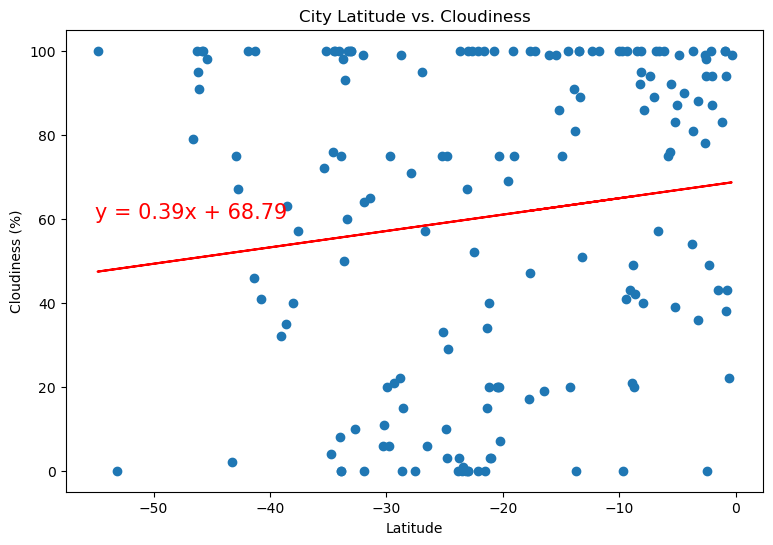

In [21]:
# Southern Hemisphere
x_val = southern_hemi_df['Lat']
y_val = southern_hemi_df['Cloudiness']
lregress(x_val,y_val,-55,60)
plt.xlabel("Latitude")
plt.ylabel ("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness")

**Discussion about the linear relationship:** We see the same linear relationship for both hemisphere, given they had the same slope and magnitude of slope, but correlation is low, and most of the values are far apart from the slope. we can infer that cloudiness does not depend on either northern or southern hemi.  

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared value is:0.02430641193042863


Text(0.5, 1.0, 'City Latitude vs. Wind Speed')

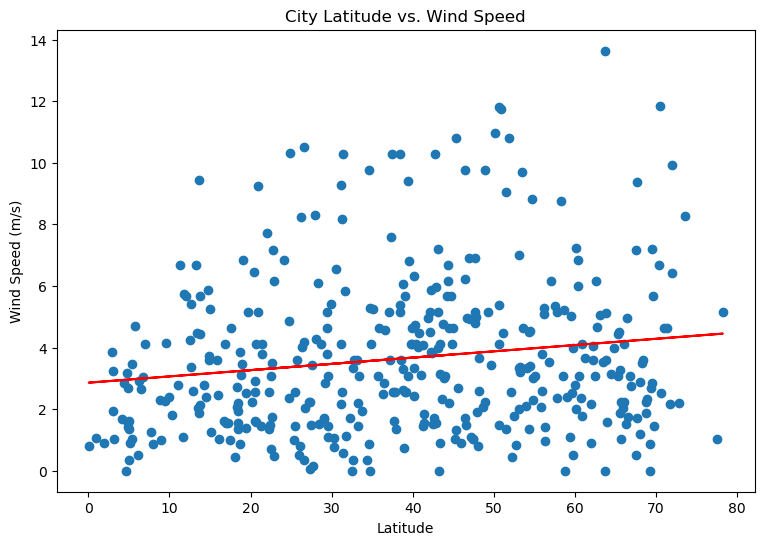

In [22]:
# Northern Hemisphere
x_val = northern_hemi_df['Lat']
y_val = northern_hemi_df['Wind Speed']
lregress(x_val,y_val,10,15)
plt.xlabel("Latitude")
plt.ylabel ("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed")

The r-squared value is:0.09839633328161233


Text(0.5, 1.0, 'City Latitude vs. Wind Speed')

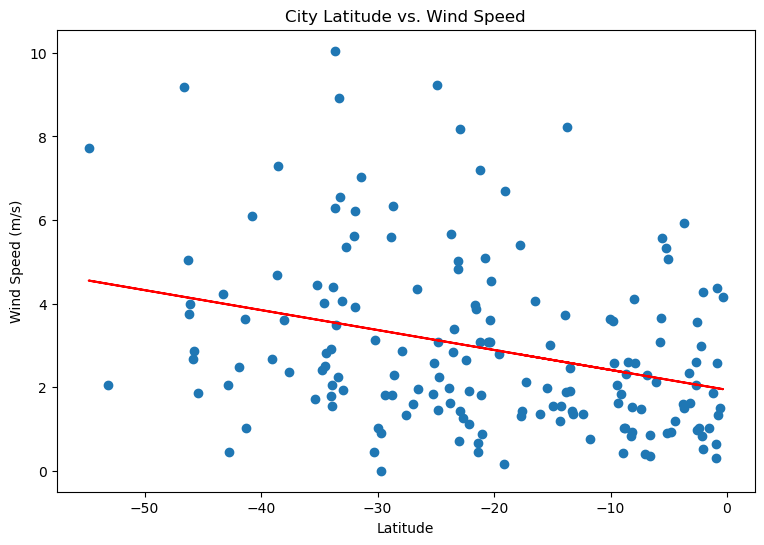

In [23]:
# Southern Hemisphere
x_val = southern_hemi_df['Lat']
y_val = southern_hemi_df['Wind Speed']
lregress(x_val,y_val,-50,15)
plt.xlabel("Latitude")
plt.ylabel ("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed")

**Discussion about the linear relationship:**  slope values are very low for both the norther and southern hemisphere. although values are closer togerher there is no correlation between the values. 